In [2]:
!pip install pycaret

     |████████████████████████████████| 288 kB 5.3 MB/s 
     |████████████████████████████████| 1.3 MB 39.2 MB/s 
     |████████████████████████████████| 6.8 MB 31.4 MB/s 
     |████████████████████████████████| 113 kB 79.7 MB/s 
     |████████████████████████████████| 1.7 MB 36.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 86 kB 6.5 MB/s 
     |████████████████████████████████| 261 kB 83.0 MB/s 
     |████████████████████████████████| 167 kB 79.9 MB/s 
     |████████████████████████████████| 15.5 MB 16.2 MB/s 
     |████████████████████████████████| 2.0 MB 45.9 MB/s 
     |████████████████████████████████| 102 kB 14.6 MB/s 
     |████████████████████████████████| 10.1 MB 54.2 MB/s 
     |████████████████████████████████| 596 kB 39.8 MB/s 
     |████████████████

In [3]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [7]:
import pandas as pd 
dataset = pd.read_csv('training5.csv')

In [8]:
#check the shape of data
dataset.shape

(8050, 14)

In [9]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (7245, 14)
Unseen Data For Predictions: (805, 14)


In [10]:
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Price', session_id=123) 

Description             Value
0                               session_id               123
1                                   Target             Price
2                            Original Data        (7245, 14)
3                           Missing Values             False
4                         Numeric Features                10
5                     Categorical Features                 3
6                         Ordinal Features             False
7                High Cardinality Features             False
8                  High Cardinality Method              None
9                    Transformed Train Set        (5071, 47)
10                    Transformed Test Set        (2174, 47)
11                      Shuffle Train-Test              True
12                     Stratify Train-Test             False
13                          Fold Generator             KFold
14                             Fold Number                10
15                                CPU Jobs                -1
16                                 Use GPU             False
17                          Log Experiment             False
18                         Experiment Name  reg-default-name
19                                     USI              c78d
20                         Imputation Type            simple
21          Iterative Imputation Iteration              None
22                         Numeric Imputer              mean
23      Iterative Imputation Numeric Model              None
24                     Categorical Imputer          constant
25  Iterative Imputation Categorical Model              None
26           Unknown Categoricals Handling    least_frequent
27                               Normalize             False
28                        Normalize Method              None
29                          Transformation             False
30                   Transformation Method              None
31                                     PCA             False
32                              PCA Method              None
33                          PCA Components              None
34                     Ignore Low Variance             False
35                     Combine Rare Levels             False
36                    Rare Level Threshold              None
37                         Numeric Binning             False
38                         Remove Outliers             False
39                      Outliers Threshold              None
40                Remove Multicollinearity             False
41             Multicollinearity Threshold              None
42             Remove Perfect Collinearity              True
43                              Clustering             False
44                    Clustering Iteration              None
45                     Polynomial Features             False
46                       Polynomial Degree              None
47                    Trignometry Features             False
48                    Polynomial Threshold              None
49                          Group Features             False
50                       Feature Selection             False
51                Feature Selection Method           classic
52            Features Selection Threshold              None
53                     Feature Interaction             False
54                           Feature Ratio             False
55                   Interaction Threshold              None
56                        Transform Target             False
57                 Transform Target Method           box-cox

In [11]:
best = compare_models(exclude = ['ransac'])

Model           MAE           MSE  \
dt                Decision Tree Regressor  3.389159e+02  4.978966e+07   
rf                Random Forest Regressor  3.142888e+02  6.228376e+07   
gbr           Gradient Boosting Regressor  4.457321e+02  5.876626e+07   
et                  Extra Trees Regressor  3.872560e+02  7.552740e+07   
ada                    AdaBoost Regressor  6.061253e+03  1.021027e+08   
lightgbm  Light Gradient Boosting Machine  1.103550e+03  1.566621e+08   
ridge                    Ridge Regression  2.874491e+03  1.308925e+08   
llar         Lasso Least Angle Regression  2.508862e+03  1.330464e+08   
lasso                    Lasso Regression  2.919860e+03  1.317635e+08   
lr                      Linear Regression  3.030178e+03  1.319765e+08   
en                            Elastic Net  2.303601e+03  1.440704e+08   
omp           Orthogonal Matching Pursuit  2.687957e+03  1.429608e+08   
br                         Bayesian Ridge  2.347141e+03  1.567742e+08   
huber                     Huber Regressor  1.838159e+03  1.573439e+08   
knn                 K Neighbors Regressor  2.552831e+03  2.573549e+08   
par          Passive Aggressive Regressor  7.293633e+03  1.112531e+09   
dummy                     Dummy Regressor  1.484287e+04  1.413953e+09   
lar                Least Angle Regression  3.157019e+10  1.704339e+24   

                  RMSE            R2   RMSLE          MAPE  TT (Sec)  
dt        4.735952e+03  9.806000e-01  0.0111  3.800000e-03     0.059  
rf        4.732907e+03  9.770000e-01  0.0096  3.200000e-03     3.015  
gbr       4.795043e+03  9.751000e-01  0.0294  1.950000e-02     0.938  
et        5.402591e+03  9.709000e-01  0.0192  5.900000e-03     2.201  
ada       9.258723e+03  9.349000e-01  1.1245  2.241400e+00     0.297  
lightgbm  1.021176e+04  9.228000e-01  0.0821  2.020000e-02     0.171  
ridge     9.092407e+03  9.215000e-01  0.7623  6.196000e-01     0.016  
llar      9.015756e+03  9.212000e-01  0.6792  5.044000e-01     0.025  
lasso     9.183767e+03  9.205000e-01  0.7427  6.268000e-01     0.110  
lr        9.218686e+03  9.201000e-01  0.7676  6.593000e-01     0.287  
en        9.057119e+03  9.147000e-01  0.6709  3.470000e-01     0.109  
omp       9.398096e+03  9.126000e-01  0.4840  3.648000e-01     0.016  
br        9.640705e+03  9.051000e-01  0.4141  3.008000e-01     0.025  
huber     9.667739e+03  9.043000e-01  0.5139  1.264000e-01     0.094  
knn       1.344723e+04  8.525000e-01  0.3601  2.064000e-01     0.078  
par       2.214973e+04  5.697000e-01  0.7119  6.863000e-01     0.026  
dummy     3.620450e+04 -1.200000e-03  1.4858  3.731900e+00     0.012  
lar       5.200609e+11 -1.190957e+15  4.8065  6.824934e+06     0.026

In [12]:
best = compare_models(exclude = ['ransac'])

Model           MAE           MSE  \
dt                Decision Tree Regressor  3.389159e+02  4.978966e+07   
rf                Random Forest Regressor  3.142888e+02  6.228376e+07   
gbr           Gradient Boosting Regressor  4.457321e+02  5.876626e+07   
et                  Extra Trees Regressor  3.872560e+02  7.552740e+07   
ada                    AdaBoost Regressor  6.061253e+03  1.021027e+08   
lightgbm  Light Gradient Boosting Machine  1.103550e+03  1.566621e+08   
ridge                    Ridge Regression  2.874491e+03  1.308925e+08   
llar         Lasso Least Angle Regression  2.508862e+03  1.330464e+08   
lasso                    Lasso Regression  2.919860e+03  1.317635e+08   
lr                      Linear Regression  3.030178e+03  1.319765e+08   
en                            Elastic Net  2.303601e+03  1.440704e+08   
omp           Orthogonal Matching Pursuit  2.687957e+03  1.429608e+08   
br                         Bayesian Ridge  2.347141e+03  1.567742e+08   
huber                     Huber Regressor  1.838159e+03  1.573439e+08   
knn                 K Neighbors Regressor  2.552831e+03  2.573549e+08   
par          Passive Aggressive Regressor  7.293633e+03  1.112531e+09   
dummy                     Dummy Regressor  1.484287e+04  1.413953e+09   
lar                Least Angle Regression  3.157019e+10  1.704339e+24   

                  RMSE            R2   RMSLE          MAPE  TT (Sec)  
dt        4.735952e+03  9.806000e-01  0.0111  3.800000e-03     0.060  
rf        4.732907e+03  9.770000e-01  0.0096  3.200000e-03     3.003  
gbr       4.795043e+03  9.751000e-01  0.0294  1.950000e-02     0.956  
et        5.402591e+03  9.709000e-01  0.0192  5.900000e-03     2.222  
ada       9.258723e+03  9.349000e-01  1.1245  2.241400e+00     0.299  
lightgbm  1.021176e+04  9.228000e-01  0.0821  2.020000e-02     0.143  
ridge     9.092407e+03  9.215000e-01  0.7623  6.196000e-01     0.016  
llar      9.015756e+03  9.212000e-01  0.6792  5.044000e-01     0.026  
lasso     9.183767e+03  9.205000e-01  0.7427  6.268000e-01     0.113  
lr        9.218686e+03  9.201000e-01  0.7676  6.593000e-01     0.021  
en        9.057119e+03  9.147000e-01  0.6709  3.470000e-01     0.114  
omp       9.398096e+03  9.126000e-01  0.4840  3.648000e-01     0.018  
br        9.640705e+03  9.051000e-01  0.4141  3.008000e-01     0.025  
huber     9.667739e+03  9.043000e-01  0.5139  1.264000e-01     0.099  
knn       1.344723e+04  8.525000e-01  0.3601  2.064000e-01     0.080  
par       2.214973e+04  5.697000e-01  0.7119  6.863000e-01     0.032  
dummy     3.620450e+04 -1.200000e-03  1.4858  3.731900e+00     0.013  
lar       5.200609e+11 -1.190957e+15  4.8065  6.824934e+06     0.026

In [13]:
models()

Name  ...  Turbo
ID                                           ...       
lr                        Linear Regression  ...   True
lasso                      Lasso Regression  ...   True
ridge                      Ridge Regression  ...   True
en                              Elastic Net  ...   True
lar                  Least Angle Regression  ...   True
llar           Lasso Least Angle Regression  ...   True
omp             Orthogonal Matching Pursuit  ...   True
br                           Bayesian Ridge  ...   True
ard       Automatic Relevance Determination  ...  False
par            Passive Aggressive Regressor  ...   True
ransac              Random Sample Consensus  ...  False
tr                       TheilSen Regressor  ...  False
huber                       Huber Regressor  ...   True
kr                             Kernel Ridge  ...  False
svm               Support Vector Regression  ...  False
knn                   K Neighbors Regressor  ...   True
dt                  Decision Tree Regressor  ...   True
rf                  Random Forest Regressor  ...   True
et                    Extra Trees Regressor  ...   True
ada                      AdaBoost Regressor  ...   True
gbr             Gradient Boosting Regressor  ...   True
mlp                           MLP Regressor  ...  False
lightgbm    Light Gradient Boosting Machine  ...   True
dummy                       Dummy Regressor  ...   True

[24 rows x 3 columns]

In [14]:
ada = create_model('ada')

MAE           MSE        RMSE      R2   RMSLE    MAPE
0     5462.6187  4.179817e+07   6465.1504  0.9607  1.0577  1.9571
1     5451.9989  4.616646e+07   6794.5905  0.9633  1.0793  2.0264
2     7045.1762  6.712523e+07   8192.9991  0.9275  1.2566  2.8205
3     6777.2512  1.320684e+08  11492.1007  0.9219  1.1710  2.4490
4     5180.9136  3.748264e+07   6122.3067  0.9516  1.0205  1.7798
5     6110.5308  5.180900e+07   7197.8471  0.9172  1.1804  2.5025
6     5173.2151  3.981103e+07   6309.5982  0.9707  1.0709  1.9676
7     5807.2431  2.095092e+08  14474.4329  0.9124  1.0637  1.9228
8     5547.8049  4.745510e+07   6888.7660  0.9264  1.0263  1.8211
9     8055.7792  3.478015e+08  18649.4378  0.8975  1.3186  3.1668
Mean  6061.2532  1.021027e+08   9258.7229  0.9349  1.1245  2.2414
SD     899.0347  9.714050e+07   4047.0637  0.0236  0.0969  0.4468

In [15]:
print(ada)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)


In [16]:
lightgbm = create_model('lightgbm')

MAE           MSE        RMSE      R2   RMSLE    MAPE
0     1004.1803  4.721532e+07   6871.3402  0.9556  0.0684  0.0171
1     1066.3637  6.274355e+07   7921.0826  0.9501  0.0703  0.0188
2     1218.5995  8.872560e+07   9419.4268  0.9042  0.0713  0.0182
3      833.7884  1.003270e+08  10016.3386  0.9406  0.0449  0.0166
4      578.2747  1.608539e+07   4010.6597  0.9792  0.0943  0.0235
5      565.8279  2.388534e+07   4887.2634  0.9618  0.1495  0.0278
6      885.7052  3.750372e+07   6124.0284  0.9724  0.0799  0.0181
7     1587.9921  3.365918e+08  18346.4383  0.8593  0.0679  0.0163
8      836.2721  3.492204e+07   5909.4872  0.9459  0.1145  0.0293
9     2458.4975  8.186214e+08  28611.5608  0.7588  0.0605  0.0162
Mean  1103.5501  1.566621e+08  10211.7626  0.9228  0.0821  0.0202
SD     534.0210  2.378159e+08   7237.5428  0.0641  0.0287  0.0046

In [17]:
dt = create_model('dt')

MAE           MSE        RMSE      R2   RMSLE    MAPE
0     141.4764  5.517437e+05    742.7945  0.9995  0.0083  0.0035
1     390.1972  2.968602e+07   5448.4882  0.9764  0.0189  0.0042
2     138.7673  1.240595e+06   1113.8202  0.9987  0.0063  0.0036
3     427.6430  3.213696e+07   5668.9466  0.9810  0.0104  0.0037
4     164.6844  3.125455e+06   1767.8957  0.9960  0.0071  0.0036
5     124.4181  1.209878e+06   1099.9447  0.9981  0.0058  0.0035
6     304.4773  1.098094e+07   3313.7498  0.9919  0.0109  0.0040
7     620.0000  9.062228e+07   9519.5737  0.9621  0.0148  0.0039
8     111.5878  3.284970e+05    573.1466  0.9995  0.0058  0.0034
9     965.9073  3.280142e+08  18111.1627  0.9033  0.0223  0.0044
Mean  338.9159  4.978966e+07   4735.9523  0.9806  0.0111  0.0038
SD    262.8499  9.646939e+07   5230.7184  0.0284  0.0055  0.0003

In [18]:
tuned_ada = tune_model(ada)

MAE           MSE        RMSE      R2   RMSLE    MAPE
0     3146.8290  1.569496e+07   3961.6859  0.9852  0.7458  0.9223
1     2831.3339  1.599707e+07   3999.6335  0.9873  0.7420  0.9120
2     3172.2979  2.707766e+07   5203.6200  0.9707  0.8275  1.1364
3     3306.7207  8.887891e+07   9427.5614  0.9474  0.6899  0.8121
4     2879.9427  1.177305e+07   3431.1875  0.9848  0.7423  0.9312
5     2951.2769  1.492520e+07   3863.3146  0.9761  0.7580  0.9539
6     2998.0482  2.061192e+07   4540.0358  0.9848  0.7839  1.0230
7     4164.3499  3.780507e+08  19443.5253  0.8419  0.7600  0.9626
8     3248.0335  1.743744e+07   4175.8166  0.9730  0.7749  0.9885
9     3610.6138  3.770587e+08  19417.9990  0.8889  0.7365  0.9135
Mean  3230.9447  9.675056e+07   7746.4380  0.9540  0.7561  0.9555
SD     380.4325  1.420261e+08   6061.6216  0.0469  0.0339  0.0802

In [19]:
print(tuned_ada)

AdaBoostRegressor(base_estimator=None, learning_rate=1e-07, loss='square',
                  n_estimators=180, random_state=123)


In [20]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
                        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                        'learning_rate': np.arange(0.1,1,0.1)
                        }

In [21]:
tuned_lightgbm = tune_model(lightgbm, custom_grid = lgbm_params)

MAE           MSE        RMSE      R2   RMSLE    MAPE
0     1194.9006  5.611985e+07   7491.3186  0.9472  0.1071  0.0283
1     1498.9375  1.247654e+08  11169.8439  0.9007  0.1213  0.0331
2     1241.4687  6.074837e+07   7794.1238  0.9344  0.1231  0.0332
3     1511.0375  2.662973e+08  16318.6173  0.8425  0.0565  0.0235
4      665.9559  1.027948e+07   3206.1633  0.9867  0.1364  0.0432
5      600.8818  1.227595e+07   3503.7052  0.9804  0.2238  0.0381
6     1123.0470  5.914364e+07   7690.4905  0.9565  0.1177  0.0312
7     1022.9444  1.681860e+08  12968.6554  0.9297  0.0832  0.0279
8     1006.4596  3.543645e+07   5952.8520  0.9451  0.1175  0.0328
9     1899.3884  4.338642e+08  20829.4078  0.8721  0.0658  0.0232
Mean  1176.5021  1.227117e+08   9692.5178  0.9295  0.1152  0.0314
SD     372.8740  1.281693e+08   5363.4660  0.0434  0.0440  0.0059

In [22]:
print(tuned_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.5, max_depth=110,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=160, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [23]:
tuned_dt = tune_model(dt)

MAE           MSE        RMSE      R2   RMSLE    MAPE
0      576.7372  8.041229e+06   2835.7061  0.9924  0.0454  0.0299
1      615.2170  1.240094e+07   3521.4965  0.9901  0.0463  0.0315
2      532.9980  7.361310e+06   2713.1734  0.9920  0.0539  0.0359
3      714.3097  3.281940e+07   5728.8220  0.9806  0.0506  0.0322
4      415.7298  3.380776e+06   1838.6888  0.9956  0.0439  0.0298
5      430.8876  5.983613e+06   2446.1425  0.9904  0.0498  0.0323
6      554.5464  1.321543e+07   3635.3035  0.9903  0.0534  0.0341
7      876.4546  9.415602e+07   9703.4023  0.9606  0.0516  0.0334
8      407.3176  2.707515e+06   1645.4528  0.9958  0.0548  0.0331
9     1563.3037  4.886638e+08  22105.7421  0.8560  0.0621  0.0338
Mean   668.7502  6.687301e+07   5617.3930  0.9744  0.0512  0.0326
SD     328.2059  1.430093e+08   5942.8867  0.0407  0.0051  0.0018

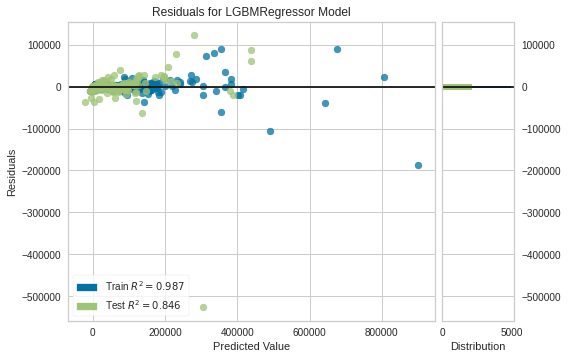

In [24]:
plot_model(tuned_lightgbm)

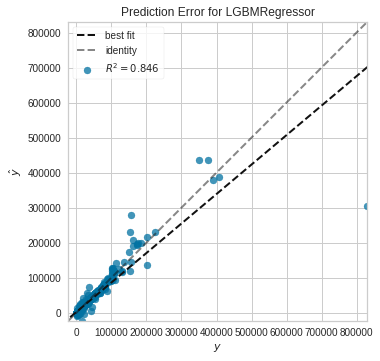

In [25]:
plot_model(tuned_lightgbm, plot = 'error')

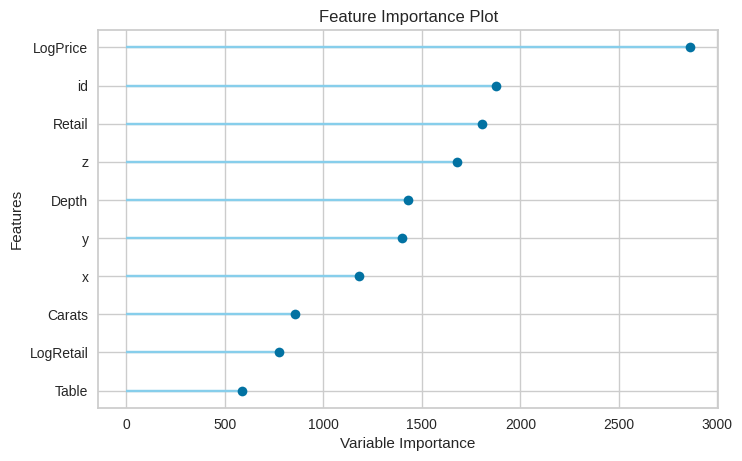

In [26]:
plot_model(tuned_lightgbm, plot='feature')

In [27]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [28]:
predict_model(tuned_lightgbm);

Model        MAE  ...   RMSLE    MAPE
0  Light Gradient Boosting Machine  1079.8226  ...  0.1347  0.0397

[1 rows x 7 columns]

In [29]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [30]:
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.5, max_depth=110,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=160, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [31]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

id  Carats Clarity Color  ...  Retail  LogPrice  LogRetail       Label
0   6    0.40     VS2     M  ...     945      6.36       6.85  574.714306
1   8    0.40     VS2     M  ...     965      6.37       6.87  590.376351
2  12    0.41     VS2     L  ...     970      6.39       6.88  589.155966
3  14    0.40     SI1     K  ...     840      6.40       6.73  534.265899
4  19    0.42     SI2     L  ...     955      6.41       6.86  565.506687

[5 rows x 15 columns]

In [32]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.Price, unseen_predictions.Label, 'R2')

0.9759

In [33]:
save_model(final_lightgbm,'Final Model 2DEC2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.5, max_depth=110,
                                min_child_samples=20, min_child_weight=0.001,
                 

In [34]:
save_model(final_lightgbm,'Final Model 2DEC2021')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.5, max_depth=110,
                                min_child_samples=20, min_child_weight=0.001,
                 

In [36]:
saved_final_lightgbm = load_model('Final Model 2DEC2021')

Transformation Pipeline and Model Successfully Loaded


In [66]:
data_unseen = pd.read_csv('offers7.csv')

In [ ]:
data_unseen 

In [67]:
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)

In [68]:
new_prediction.head()

...2    id  Carats Clarity  ... LogPrice  LogRetail  Offers        Label
0     1  8051    0.42     SI2  ...      NaN        NaN     NaN  6590.640815
1     2  8052    0.40     VS2  ...      NaN        NaN     NaN  6570.728775
2     3  8053    0.41     SI2  ...      NaN        NaN     NaN  6613.487143
3     4  8054    0.40     SI1  ...      NaN        NaN     NaN  6465.076005
4     5  8055    0.40     VS2  ...      NaN        NaN     NaN  6585.961121

[5 rows x 17 columns]

In [64]:
#df_test = feature_importance.sort_values('feature_importance',ascending=False)
new_prediction.to_csv("Potential_Offers.csv", index=True) 

In [69]:
new_prediction = new_prediction.drop(columns=['Price','Retail','LogPrice','LogRetail','Offers'])

In [71]:
new_prediction = new_prediction.rename(columns={'Labels': 'Offers'}, inplace=True)

In [73]:
new_prediction.head()

AttributeError: ignored

In [74]:
from pycaret.utils import check_metric
check_metric(new_prediction.Pri

AttributeError: ignored

In [ ]:
ce, new_prediction.Label, 'R2')

In [ ]:
# read wherever you have stored the file
df_test1 = pd.read_excel(pd.read_csv('Offers.csv')

# convert new series to df
#new_df =  pd.DataFrame(var1)


df_test1.join(df_test,lsuffix='_sex')

# write to excel
df_test1.to_csv("Offers.csv", index=True) 

In [ ]:
df_test = feature_importance.sort_values('feature_importance',ascending=False)
df_test2 = df_test[:5]
df_test2.to_csv("Offers.csv", index=True) 